
Model Evaluation with Default Threshold (0.5):
Confusion Matrix:
[[106   2]
 [  1  62]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


ROC-AUC Score: 0.9979


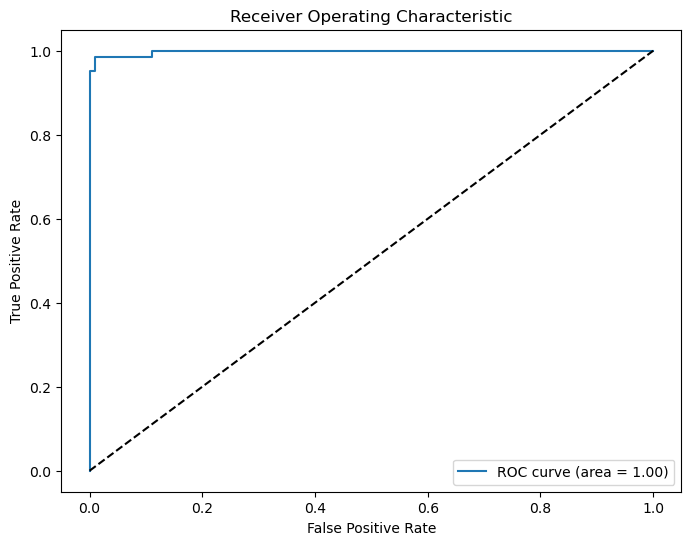


Threshold Tuning and Analysis:


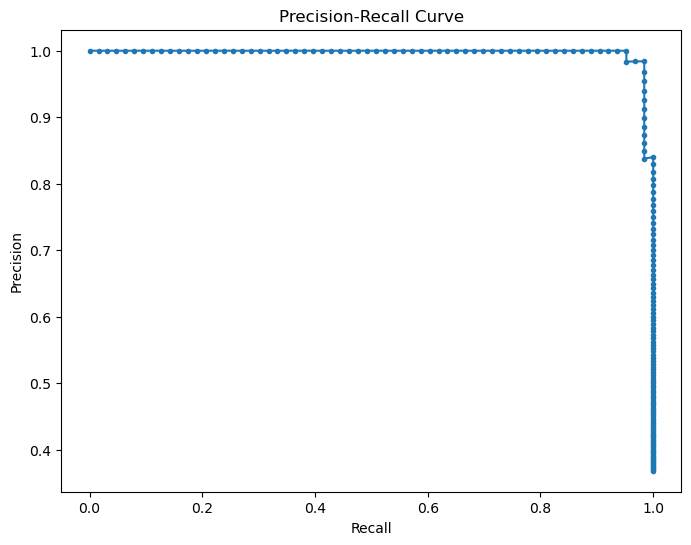


Best Threshold (Youden's J statistic): 0.5263

Adjusted Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171


Adjusted Confusion Matrix:
[[107   1]
 [  1  62]]

Explanation:
The logistic regression model uses the sigmoid function to convert
linear predictions to probabilities between 0 and 1.
Default threshold is 0.5, but we can adjust this based on our needs:
- Lower threshold increases recall (catch more cancer cases)
- Higher threshold increases precision (reduce false positives)
Optimal threshold found: 0.5263


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, 
                            roc_auc_score, roc_curve, precision_recall_curve)

def load_and_prepare_data():
    data = pd.read_csv(r"C:\Users\kanik\Downloads\data.csv")
    
    data = data.drop(['id', 'Unnamed: 32'], axis=1)
    
    data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
    
    X = data.drop('diagnosis', axis=1)
    y = data['diagnosis']
    
    return X, y

def preprocess_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test, scaler

def train_model(X_train, y_train):
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    return model

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    return y_pred_proba

def threshold_tuning(y_test, y_pred_proba):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    print(f'\nBest Threshold (Youden\'s J statistic): {best_thresh:.4f}')
    
    y_pred_adj = (y_pred_proba >= best_thresh).astype(int)
    
    print("\nAdjusted Classification Report:")
    print(classification_report(y_test, y_pred_adj))
    
    print("\nAdjusted Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_adj))
    
    return best_thresh

def main():
    X, y = load_and_prepare_data()
    
    X_train, X_test, y_train, y_test, scaler = preprocess_data(X, y)
    
    model = train_model(X_train, y_train)
    
    print("\nModel Evaluation with Default Threshold (0.5):")
    y_pred_proba = evaluate_model(model, X_test, y_test)
    
    print("\nThreshold Tuning and Analysis:")
    best_thresh = threshold_tuning(y_test, y_pred_proba)
    
    print("\nExplanation:")
    print("The logistic regression model uses the sigmoid function to convert")
    print("linear predictions to probabilities between 0 and 1.")
    print("Default threshold is 0.5, but we can adjust this based on our needs:")
    print("- Lower threshold increases recall (catch more cancer cases)")
    print("- Higher threshold increases precision (reduce false positives)")
    print(f"Optimal threshold found: {best_thresh:.4f}")

if __name__ == "__main__":
    main()